<a href="https://colab.research.google.com/github/m3n99/Multimedia-Networking_Task1-/blob/main/Maen_Khdour_1171944_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1_Import Libraries**

In [1]:
#Libraries
from google.colab import files
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from numpy import r_
from scipy import fftpack

**2_Uplode the photo**

In [2]:
#from library files we uplode any file we want 
photo_uplode = files.upload()

Saving 20200324_231812.jpg to 20200324_231812 (1).jpg


**3_See the Image we upolded (original)**

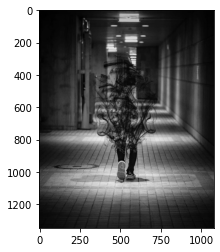

In [3]:
# load image as pixel array (imread) and show the img (extra) using library cv2 
img= cv2.imread('20200324_231812.jpg') # read the image we uplode and store it in array
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)# turn the img to Gray mode 
plt.imshow(img1,cmap="gray") # plot the img , and cmap use to change the color of img since the function plt chnage the color of img and we want it as gary 

 **4_ Define the Function of 2D_DCT**


In [4]:
# define the 2D_dct and the inverse of it from the library scipy.fftpack
def dct_2D(img_matrix):
    return fftpack.dct(fftpack.dct(img_matrix,norm='ortho'),norm='ortho')

def idct_2D(img_matrix):
    return fftpack.idct(fftpack.idct(img_matrix,norm='ortho'),norm='ortho')

***5_  Define the functions of Zigzag and inverse Zigzag***

In [5]:
# I serach on internet and found this is the best one i can use so i copied it.
# The link of Zigzag:  https://github.com/getsanjeev/compression-DCT/blob/master/zigzag.py

#Zigzag#

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0
    vmax = input.shape[0]
    hmax = input.shape[1]
    #print(vmax ,hmax )
    i = 0
    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up   
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1
        else:                                    # going down
        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 
        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1
        		i = i + 1
        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break
    #print ('v:',v,', h:',h,', i:',i)
    return output


In [9]:
#Inverse Zigzag#
def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0
	vmin = 0
	hmin = 0
	output = np.zeros((vmax, hmax))
	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
			
				output[v, h] = input[i]        # if we got to the first line
				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        
				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1     
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1

		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break
	return output

**6_ Define the function will make zeros in Zigzag**

In [6]:
# array: is the array of Zigzag.
# K : is the coefficient of number of zeros in the last of array.
def put_zeros(array,k):
  for i in range(len(array)):
    if(i>(len(array)-k-1)):
      array[i] = 0

**7_Run Code**

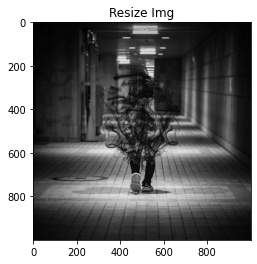

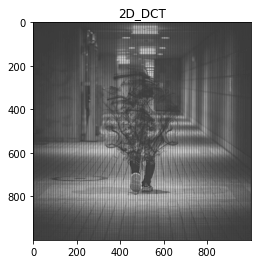

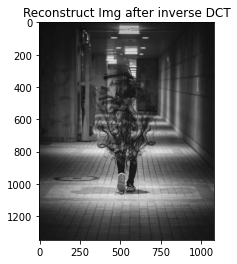

In [15]:
# read img into matrix 
img_matrix= cv2.imread('20200324_231812.jpg',0) # 0: mean the gary mode

# save the original width and hight for the img.
ohight,owidth= img_matrix.shape[:2]

#resize the img as you want to be easy to divided it to blocks, just change the 1000 to be suitable with your pic 
resized_img = cv2.resize(img_matrix, (1000,1000), interpolation=cv2.INTER_CUBIC)

#define the number of block we want to divided the img into it
numBlock=8

#define the coefficient of number of zeros
numzeros=0 # 0 : maen no zeros in matrix

#deine the varaibles for containe an size of img, matrix have the size of img to make dct and inverse of dct.
size = resized_img.shape
matrix_Blocks= np.zeros(size)
inmatrix_Blocks= np.zeros(size)



# Two loops that divided the img into blocks depends on the size of imge then divided every block on it depends on the numBlock
for i in r_[:size[0]:numBlock]:
  for j in r_[:size[1]:numBlock]:
    matrix_Blocks[i:(i+numBlock),j:(j+numBlock)] = dct_2D(resized_img[i:(i+numBlock),j:(j+numBlock)]) # make 2D_DCT
    outzig= zigzag(matrix_Blocks[i:(i+numBlock),j:(j+numBlock)]) # Make Zigzag on the DCT
    put_zeros(outzig,numzeros) # put zeros 
    inoutzig = inverse_zigzag(outzig,numBlock,numBlock) #inverse of zigzag
    inmatrix_Blocks[i:(i+numBlock),j:(j+numBlock)] = idct_2D(inoutzig) # inverse 2D_DCT 

# return the original size for pic and the reconstructer img
re_img = cv2.resize(inmatrix_Blocks, (owidth,ohight), interpolation=cv2.INTER_CUBIC)

plt.title("Resize Img")
plt.imshow(resized_img,cmap="gray") #plt the img
plt.show()

plt.title("2D_DCT")
plt.imshow(matrix_Blocks,cmap="gray") #plt the img
plt.show()

plt.title("Reconstruct Img after inverse DCT")
plt.imshow(re_img,cmap="gray")
plt.show()




**8_Run code with Different coeffiecient of zeros(zigzag)**

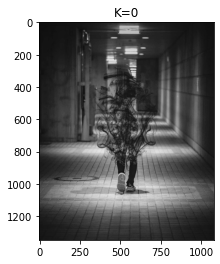

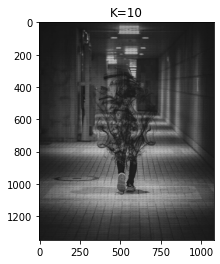

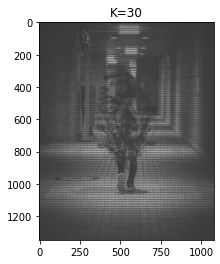

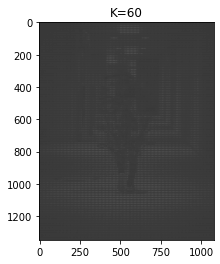

In [24]:
# read img into matrix 
img_matrix= cv2.imread('20200324_231812.jpg',0) # 0: mean the gary mode

# save the original width and hight for the img.
ohight,owidth= img_matrix.shape[:2]

#resize the img as you want to be easy to divided it to blocks, just change the 1000 to be suitable with your pic 
resized_img = cv2.resize(img_matrix, (1000,1000), interpolation=cv2.INTER_CUBIC)

#define the number of block we want to divided the img into it
numBlock=8

#define the coefficient of number of zeros
k=0  # 0 : maen no zeros in matrix (K)
k1=10 
k2=30 
k3=60 
#deine the varaibles for containe an size of img, matrix have the size of img to make dct and inverse of dct.
size = resized_img.shape
matrix_Blocks= np.zeros(size)
inmatrix_Blocks= np.zeros(size)
matrix_Blocks1= np.zeros(size)
inmatrix_Blocks1= np.zeros(size)
matrix_Blocks2= np.zeros(size)
inmatrix_Blocks2= np.zeros(size)
matrix_Blocks3= np.zeros(size)
inmatrix_Blocks3= np.zeros(size)

# k=0
for i in r_[:size[0]:numBlock]:
  for j in r_[:size[1]:numBlock]:
    matrix_Blocks[i:(i+numBlock),j:(j+numBlock)] = dct_2D(resized_img[i:(i+numBlock),j:(j+numBlock)]) # make 2D_DCT
    outzig= zigzag(matrix_Blocks[i:(i+numBlock),j:(j+numBlock)]) # Make Zigzag on the DCT
    put_zeros(outzig,k) # put zeros 
    inoutzig = inverse_zigzag(outzig,numBlock,numBlock) #inverse of zigzag
    inmatrix_Blocks[i:(i+numBlock),j:(j+numBlock)] = idct_2D(inoutzig) # inverse 2D_DCT 


# K=10
for i in r_[:size[0]:numBlock]:
  for j in r_[:size[1]:numBlock]:
    matrix_Blocks1[i:(i+numBlock),j:(j+numBlock)] = dct_2D(resized_img[i:(i+numBlock),j:(j+numBlock)]) # make 2D_DCT
    outzig1= zigzag(matrix_Blocks1[i:(i+numBlock),j:(j+numBlock)]) # Make Zigzag on the DCT
    put_zeros(outzig1,k1) # put zeros 
    inoutzig1 = inverse_zigzag(outzig1,numBlock,numBlock) #inverse of zigzag
    inmatrix_Blocks1[i:(i+numBlock),j:(j+numBlock)] = idct_2D(inoutzig1) # inverse 2D_DCT 


#K= 30
for i in r_[:size[0]:numBlock]:
  for j in r_[:size[1]:numBlock]:
    matrix_Blocks2[i:(i+numBlock),j:(j+numBlock)] = dct_2D(resized_img[i:(i+numBlock),j:(j+numBlock)]) # make 2D_DCT
    outzig2= zigzag(matrix_Blocks2[i:(i+numBlock),j:(j+numBlock)]) # Make Zigzag on the DCT
    put_zeros(outzig2,k2) # put zeros 
    inoutzig2 = inverse_zigzag(outzig2,numBlock,numBlock) #inverse of zigzag
    inmatrix_Blocks2[i:(i+numBlock),j:(j+numBlock)] = idct_2D(inoutzig2) # inverse 2D_DCT 


#K= 60
for i in r_[:size[0]:numBlock]:
  for j in r_[:size[1]:numBlock]:
    matrix_Blocks3[i:(i+numBlock),j:(j+numBlock)] = dct_2D(resized_img[i:(i+numBlock),j:(j+numBlock)]) # make 2D_DCT
    outzig3= zigzag(matrix_Blocks3[i:(i+numBlock),j:(j+numBlock)]) # Make Zigzag on the DCT
    put_zeros(outzig3,k3) # put zeros 
    inoutzig3 = inverse_zigzag(outzig3,numBlock,numBlock) #inverse of zigzag
    inmatrix_Blocks3[i:(i+numBlock),j:(j+numBlock)] = idct_2D(inoutzig3) # inverse 2D_DCT 


# return the original size for pic and the reconstructer img
re_img = cv2.resize(inmatrix_Blocks, (owidth,ohight), interpolation=cv2.INTER_CUBIC)
re_img1 = cv2.resize(inmatrix_Blocks1, (owidth,ohight), interpolation=cv2.INTER_CUBIC)
re_img2 = cv2.resize(inmatrix_Blocks2, (owidth,ohight), interpolation=cv2.INTER_CUBIC)
re_img3 = cv2.resize(inmatrix_Blocks3, (owidth,ohight), interpolation=cv2.INTER_CUBIC)

#plot the imges
plt.title("K=0")
plt.imshow(re_img,cmap="gray")
plt.show()

plt.title("K=10")
plt.imshow(re_img1,cmap="gray") #plt the img
plt.show()

plt.title("K=30")
plt.imshow(re_img2,cmap="gray") #plt the img
plt.show()

plt.title("K=60")
plt.imshow(re_img3,cmap="gray") #plt the img
plt.show()